In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from functools import reduce

In [2]:
#### The basic gradient descent ####

In [3]:
## This exercise is from: https://github.com/dtnewman/stochastic_gradient_descent/blob/master/stochastic_gradient_descent.ipynb
## lets take a function
f = lambda x: 2*x**3 - 3*x +1 #x**3-2*x**2+2

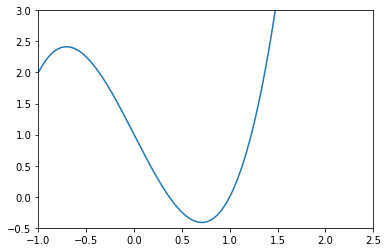

In [4]:
## lets make some data and visualize the function
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([-0.5,3])
plt.show()

In [5]:
## get the derivative of the f
fprime = lambda x: 6*x**2 - 3

In [6]:
x_old = 0
x_new = 1 ## 1.5, 2, -0.7
alpha = 0.1 ## 0.01
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]
#print(y_list)
## until the step difference becomes less than the precision.
while abs(x_new - x_old) > precision:
    #print(abs(x_new - x_old))
    #print(x_new)
    x_old = x_new
    x_new = x_old - alpha * fprime(x_new)
    print(fprime(x_new))
    x_list.append(x_new)
    y_list.append(f(x_new))

-0.0600000000000005
-0.009384000000000281
-0.001428591632640419
-0.00021655764055816817
-3.2806207725055714e-05


In [7]:
print("Number of iterations: {}".format(len(x_list)))
print("Local minimum: {}".format(x_new))

Number of iterations: 6
Local minimum: 0.7071029149273198


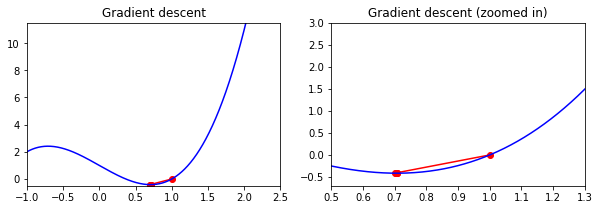

In [8]:
## Plot how x was stepping towards the local minima
plt.figure(figsize=[10,3])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-1,2.5])
plt.ylim([-0.5,11.5])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.5,1.3])
plt.ylim([-0.7,3])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [9]:
#### Simple function optimization ####

In [10]:
## a simple linear regression model
model = lambda theta_1, theta_2, x: theta_1 + theta_2 * x
## cost function (MSE)
mse = lambda n, x, y, theta_1, theta_2: (1 / n)*(model(theta_1, theta_2, x) - y) ** 2
## Partial derivative w.r.t thetas
prime_mse_theta_1 = lambda n, y, x, theta_1, theta_2: (2 / n) * (model(theta_1, theta_2, x) - y)
prime_mse_theta_2 = lambda n, y, x, theta_1, theta_2: (2 / n) * (model(theta_1, theta_2, x) - y) * x

In [11]:
## lets make some data
## linear data generation
data_function = lambda x: 2 * x + np.random.uniform(0, 1)
#data = np.random.normal(size=100)
x_vals = np.arange(0, 1, 0.01)
#print(x_vals)
y_vals = list(map(data_function, x_vals))
#print(y_vals)


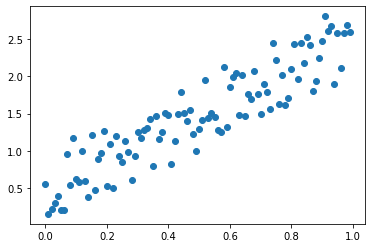

In [12]:
plt.scatter(x_vals, y_vals)

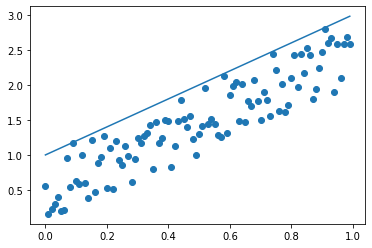

In [13]:
## some initial parameters
theta_1_old = 0
theta_1_new = 1
theta_2_old = 0
theta_2_new = 2

n = len(x_vals)

learning_rate = 0.001
precision = 0.001

## Initial model behaviour
plt.scatter(x_vals, y_vals)
y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))

y = y_vals[0]
x = x_vals[0]

#print(y_pred)
#print(y)
#print(y_vals)
plt.plot(x_vals, y_pred)

In [14]:
#print(mse(n, x, y, theta_1_new, theta_2_new))
#print(list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n)))
print(reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))

#while reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))) > precision:
for i in range(300):
    #print(mse(x, y, theta_1_new, theta_2_new))
    #print(reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))
    ## assign the old thetats
    theta_1_old = theta_1_new
    theta_2_old = theta_2_new
    ## get the new thetas
    grad_theta_list_1 = list(map(prime_mse_theta_1, [n]*n, y_vals, x_vals, [theta_1_old]*n, [theta_2_old]*n))
    grad_theta_1 = reduce(lambda x, y: x + y, grad_theta_list_1)
    theta_1_new = theta_1_old - learning_rate * grad_theta_1
    
    grad_theta_list_2 = list(map(prime_mse_theta_2, [n]*n, y_vals, x_vals, [theta_1_old]*n, [theta_2_old]*n))
    grad_theta_2 = reduce(lambda x, y: x + y, grad_theta_list_2)
    theta_2_new = theta_2_old - learning_rate * grad_theta_2
    
    y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))

print(reduce(lambda x, y: x + y, list(map(mse, [n]*n, x_vals, y_vals, [theta_1_new]*n, [theta_2_new]*n))))
print(theta_1_new)
print(theta_2_new)


0.35651302100494187
0.1425978723253991
0.7750612625233237
1.8962967264449497


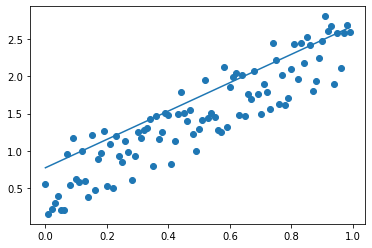

In [15]:
plt.scatter(x_vals, y_vals)
y_pred = list(map(model, [theta_1_new]*n, [theta_2_new]*n, x_vals))
#print(y_pred)
plt.plot(x_vals, y_pred)